In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/jogja___.csv')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

lokasi               0
harga                0
kamar_tidur          0
bangunan             0
lahan                0
                    ..
sman_3_yogyakarta    0
jenis_rumah          0
kategori             0
latitude             0
longitude            0
Length: 75, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   lokasi                                               1352 non-null   object 
 1   harga                                                1352 non-null   int64  
 2   kamar_tidur                                          1352 non-null   int64  
 3   bangunan                                             1352 non-null   int64  
 4   lahan                                                1352 non-null   int64  
 5   alamat                                               1352 non-null   object 
 6   kamar_mandi                                          1352 non-null   int64  
 7   sistem_alarm                                         1352 non-null   object 
 8   gym                                                  1352 non-null  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
skewness_features = ['harga', 'kamar_tidur', 'bangunan', 'lahan', 'kamar_mandi']
skewness_subset = df[skewness_features]

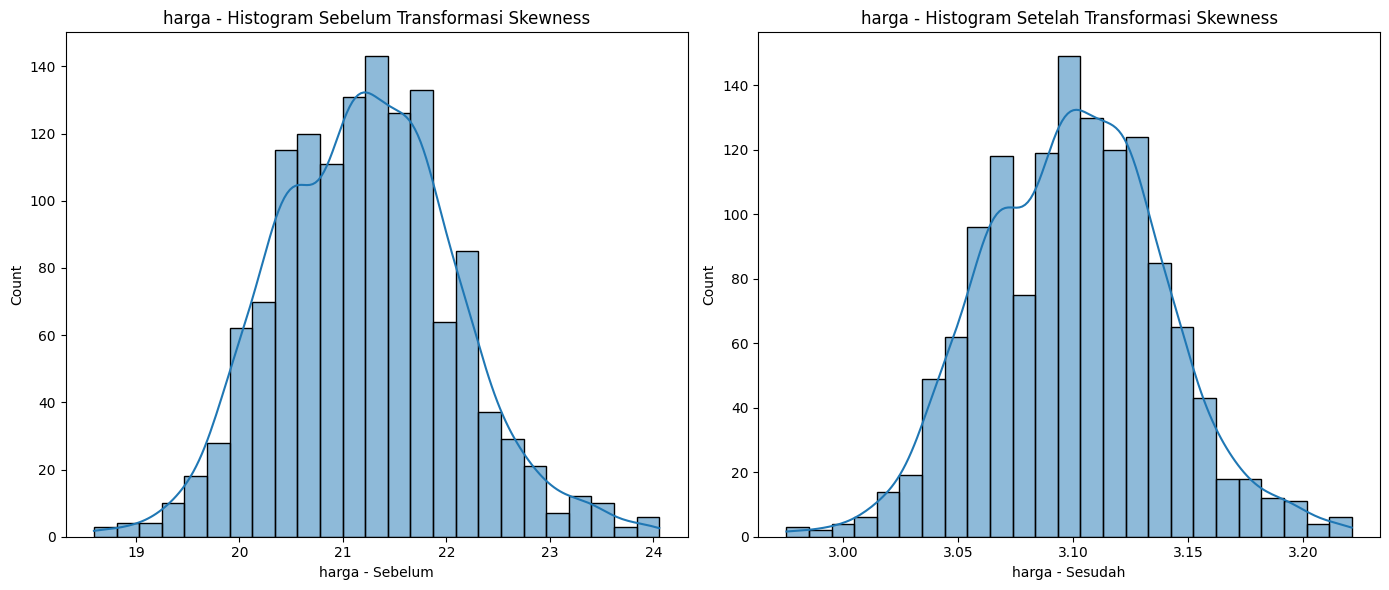

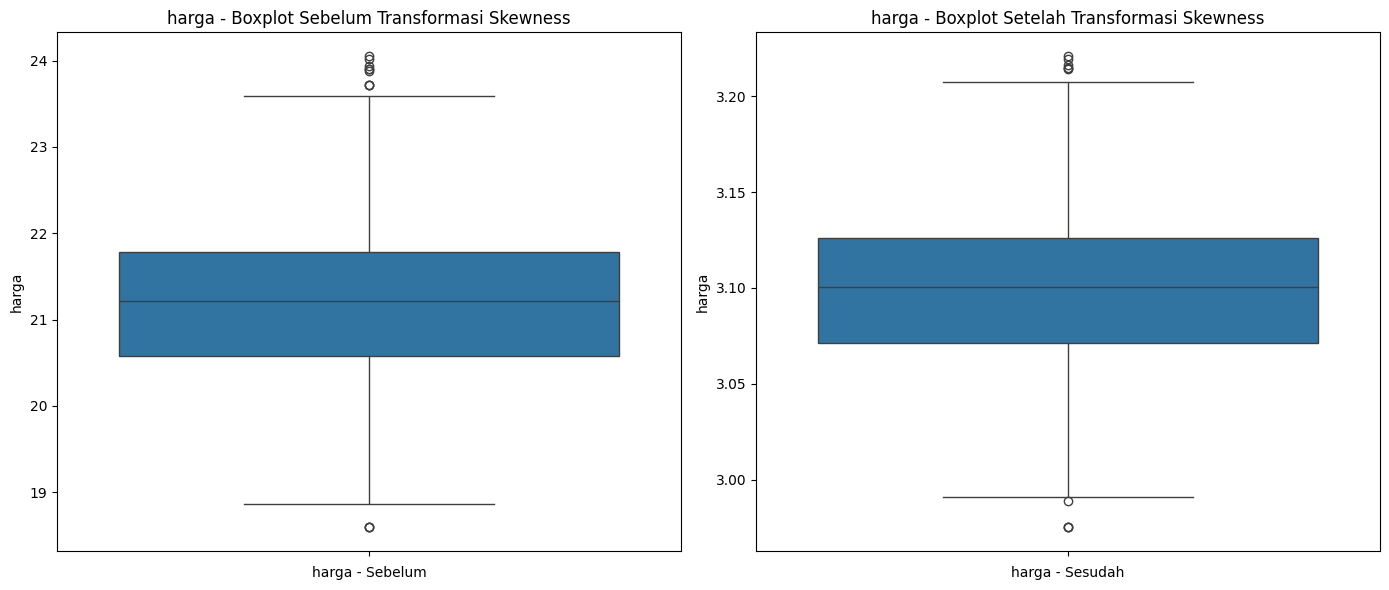

<Figure size 640x480 with 0 Axes>

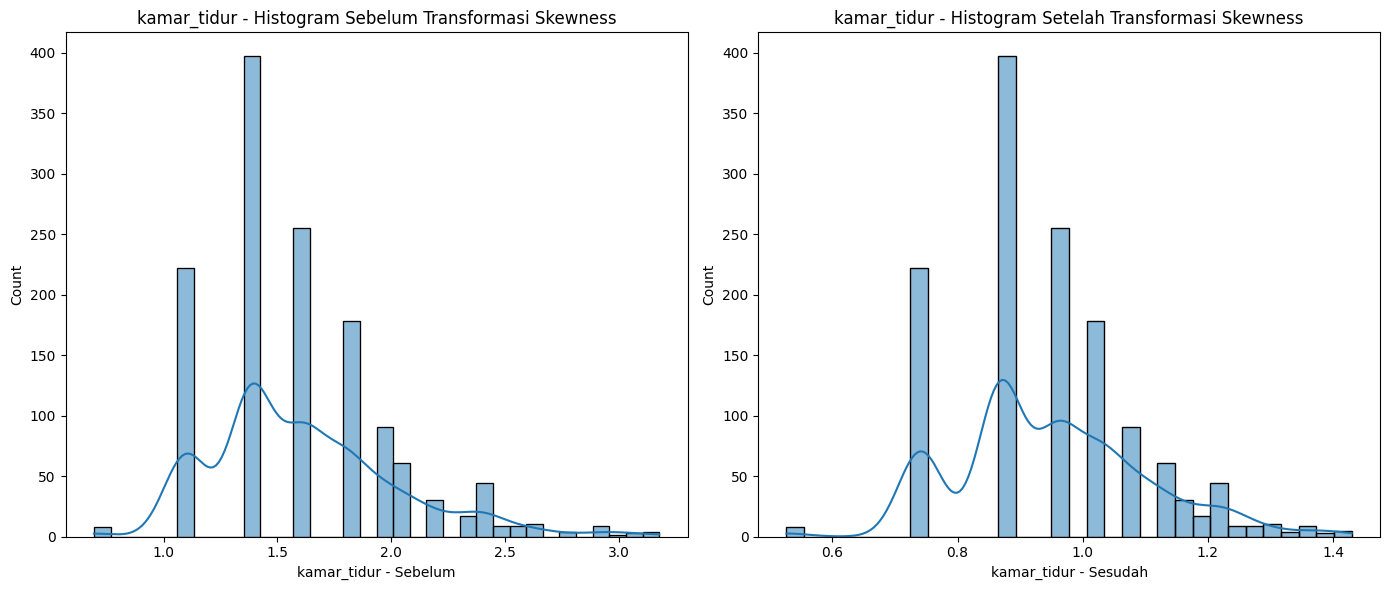

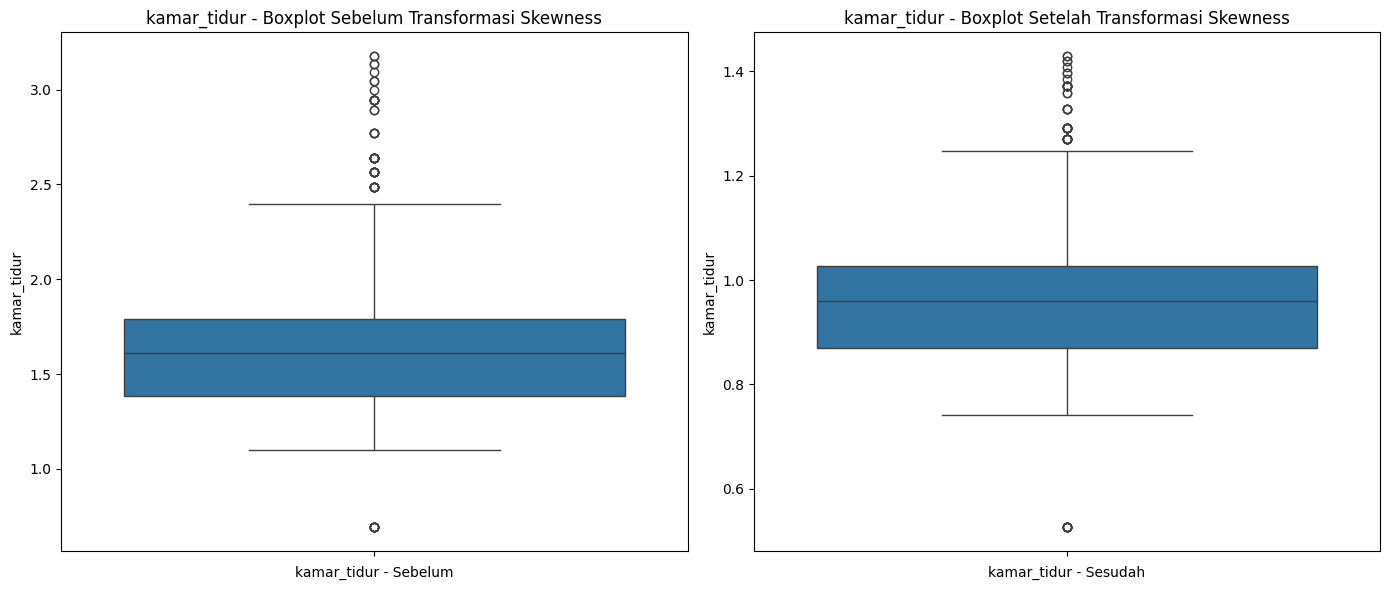

<Figure size 640x480 with 0 Axes>

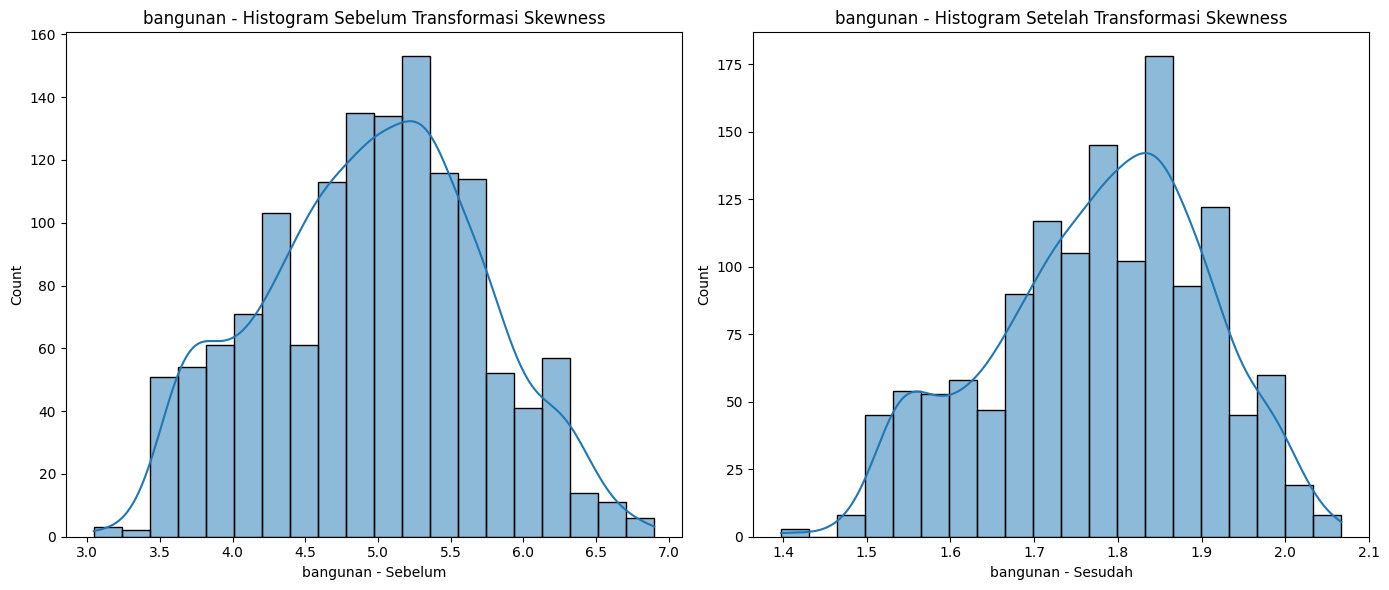

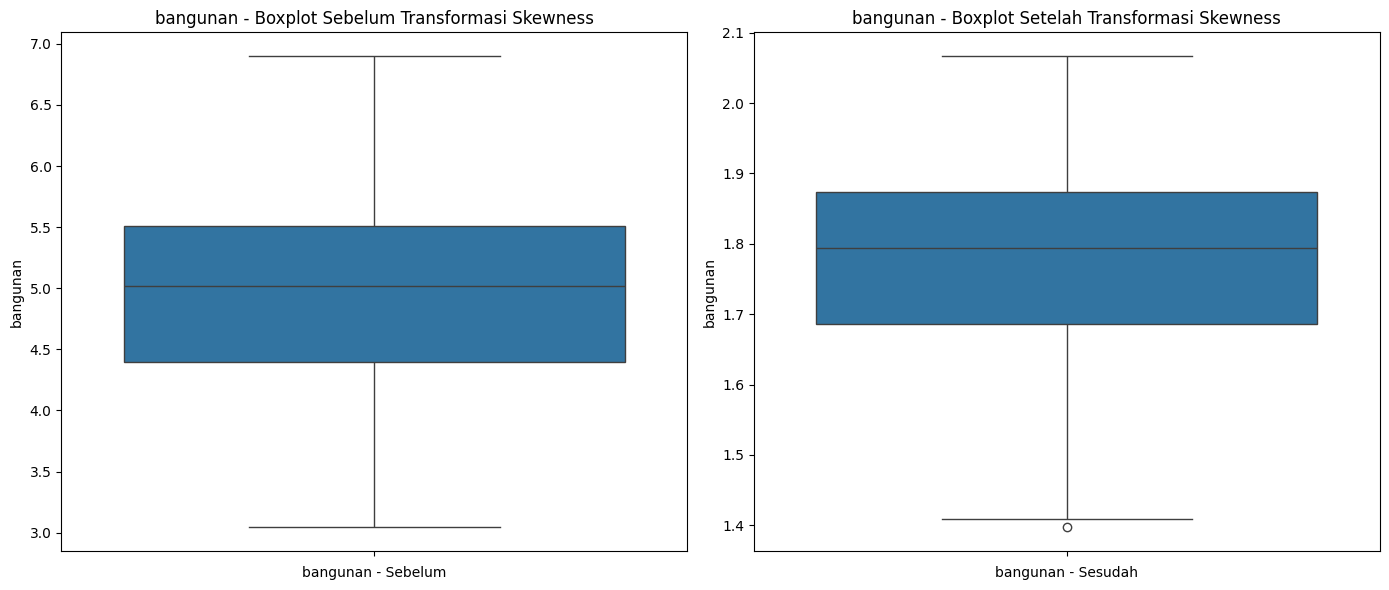

<Figure size 640x480 with 0 Axes>

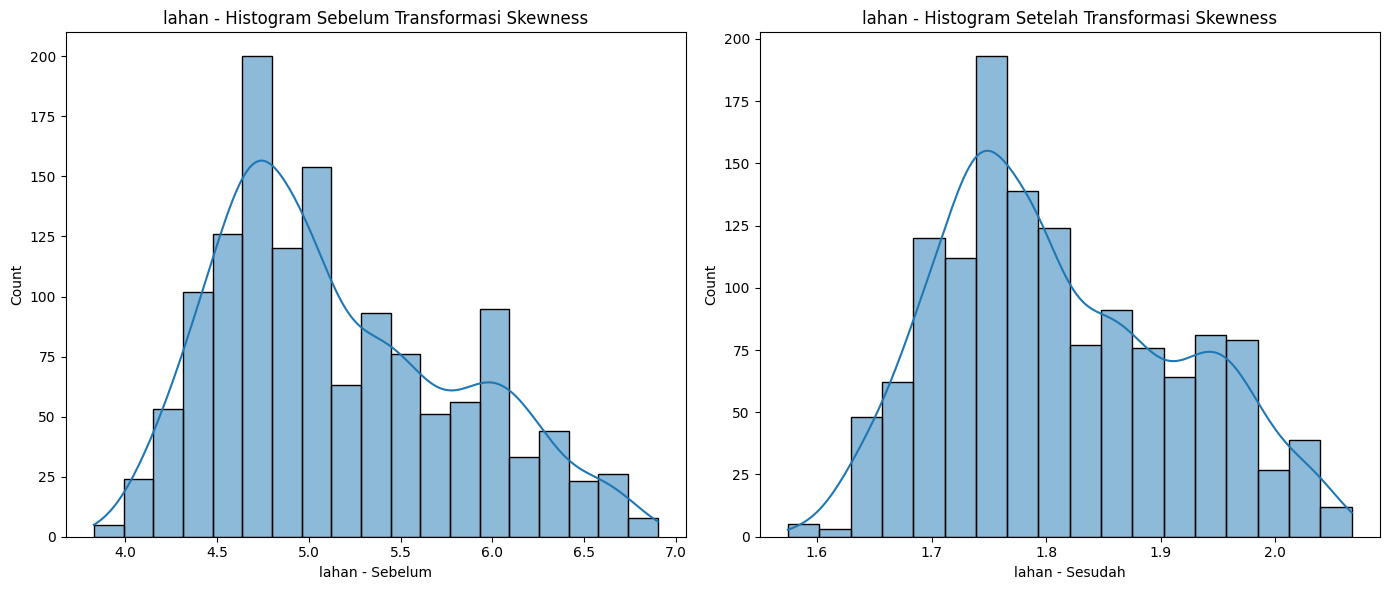

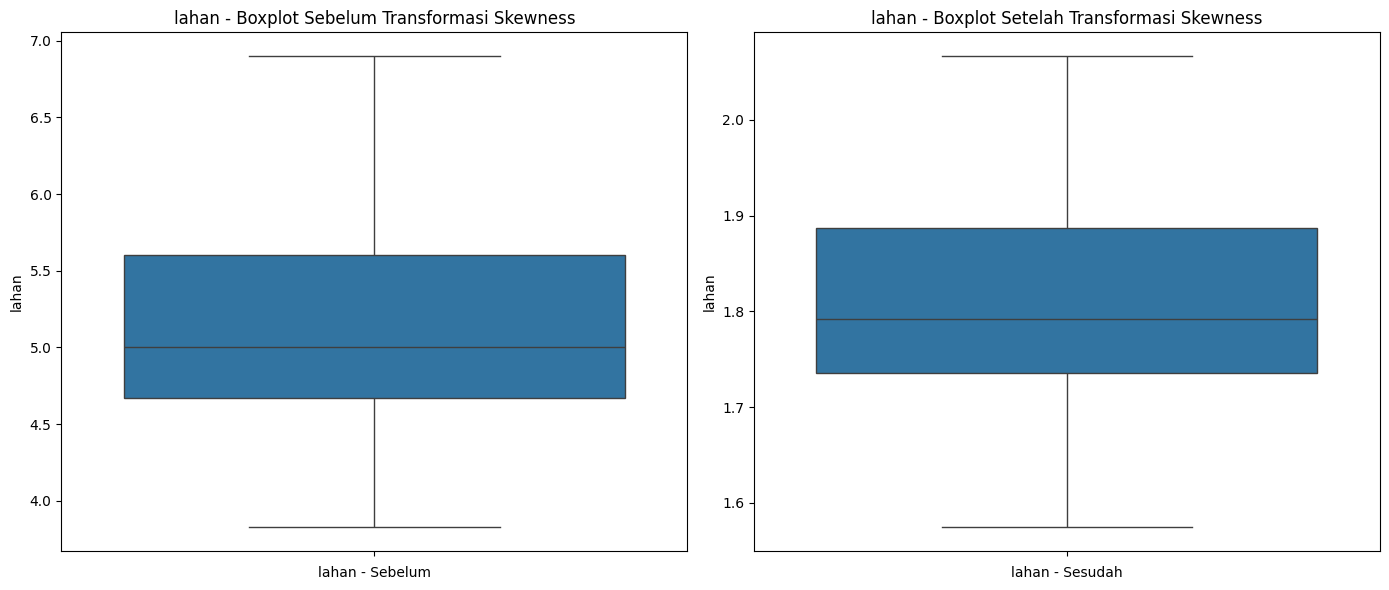

<Figure size 640x480 with 0 Axes>

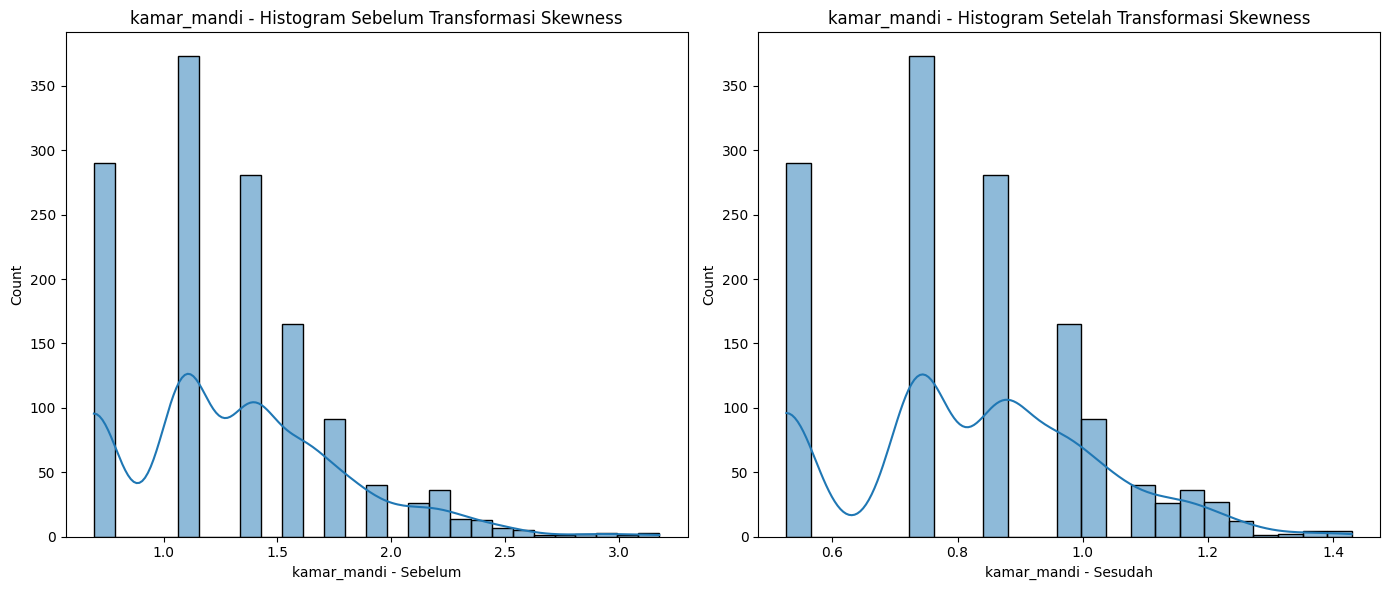

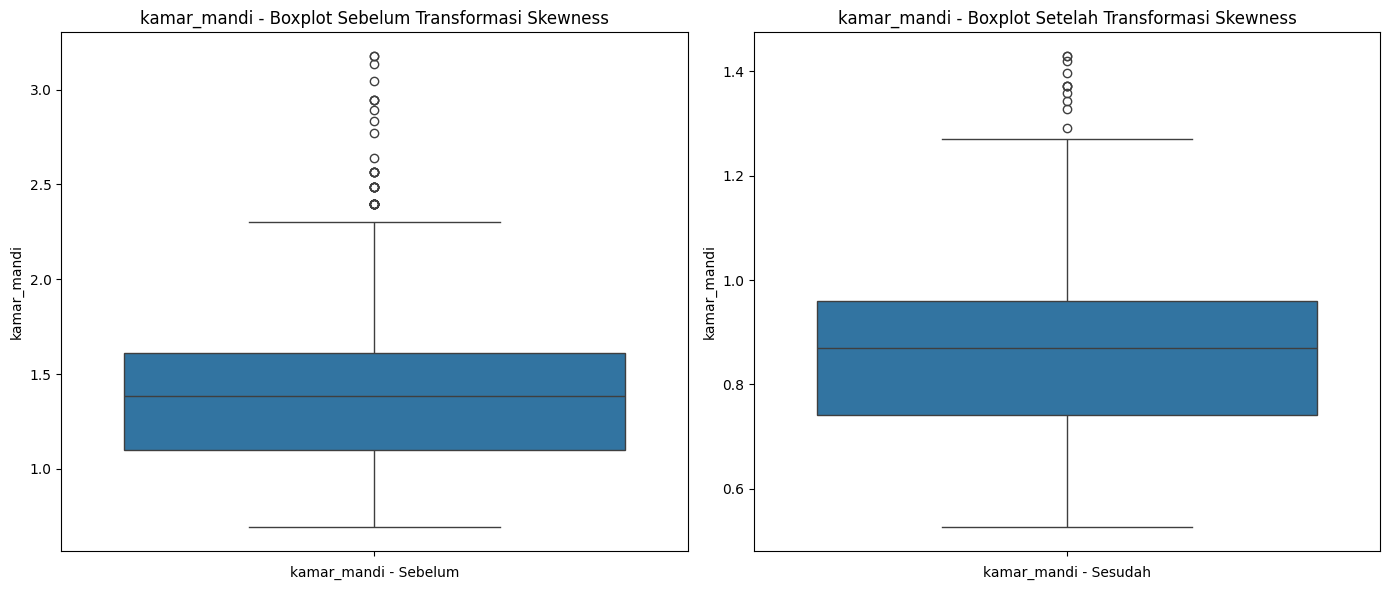

<Figure size 640x480 with 0 Axes>

In [ ]:
skewness_before = df[skewness_features].apply(lambda x: skew(x.dropna()))

# Mengaplikasikan transformasi skewness hanya pada fitur dengan skewness > 0.75
skew_threshold =  0.75
skewed_features = skewness_before[skewness_before > skew_threshold].index
df[skewed_features] = np.log1p(df[skewed_features])

# Menyiapkan visualisasi sebelum dan sesudah transformasi skewness
for feature in skewness_features:
    plt.figure(figsize=(14, 6))

    # Visualisasi histogram sebelum transformasi skewness
    plt.subplot(1, 2, 1)
    plt.title(f'{feature} - Histogram Sebelum Transformasi Skewness')
    sns.histplot(df[feature], kde=True)
    plt.xlabel(f'{feature} - Sebelum')

    # Visualisasi histogram setelah transformasi skewness
    plt.subplot(1, 2, 2)
    plt.title(f'{feature} - Histogram Setelah Transformasi Skewness')
    sns.histplot(np.log1p(df[feature]), kde=True)
    plt.xlabel(f'{feature} - Sesudah')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))

    # Boxplot sebelum transformasi skewness
    plt.subplot(1, 2, 1)
    plt.title(f'{feature} - Boxplot Sebelum Transformasi Skewness')
    sns.boxplot(x=None, y=df[feature])
    plt.xlabel(f'{feature} - Sebelum')

    # Boxplot setelah transformasi skewness
    plt.subplot(1, 2, 2)
    plt.title(f'{feature} - Boxplot Setelah Transformasi Skewness')
    sns.boxplot(x=None, y=np.log1p(df[feature]))
    plt.xlabel(f'{feature} - Sesudah')

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{feature}_transformations.png')

In [ ]:
skewness = df[['harga','kamar_tidur', 'bangunan','lahan','kamar_mandi']]
skewed_train = skewness.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > 0.75]
df[skewed_train.index] = np.log1p(df[skewed_train.index])

In [ ]:
df.head()

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
0,Yogyakarta,20.530894,0.741276,3.713572,4.204693,Yogyakarta,1.098612,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917
1,Jetis,21.242060,0.959135,4.948760,6.216606,"Jetis, Yogyakarta",1.791759,N,N,N,...,N,N,N,N,N,N,rumah,premium,-8.035127,110.490835
2,Yogyakarta,20.650695,0.741276,4.204693,4.532599,"Jalan Gedongan Kuning Selatan, Purbayan Kel., ...",1.098612,N,N,N,...,N,N,N,N,N,N,rumah,premium,-7.801195,110.364917
3,Mergangsan,22.227343,0.959135,5.860786,5.442418,"jalan parangtritis jogja Mergangsan, Yogyakarta",1.609438,Y,Y,Y,...,N,N,N,N,N,N,perumahan,premium,-7.814734,110.372558
4,Kraton,20.985630,0.869742,4.510860,4.615121,"Kraton, Yogyakarta",0.693147,N,N,N,...,N,Y,N,N,N,N,rumah,biasa,-7.808799,110.362726


In [ ]:
mapping = {'Y': 1, 'N': 0}

fitur_1 = [
    'sistem_alarm','gym','internet_broadband_wifi','tv_kabel','pemanas_ruangan','pendingin_ruangan',
    'air_panas','telepon','televisi','kitchen_set','garasi','secure_parking','kolam_renang','lapangan_tenis',
    'balkon','dek','halaman_terbuka','area_hiburan_outdoor','pagar_penuh','taman','keamanan_24_jam','taman_bermain_anak'
]

df[fitur_1] = df[fitur_1].replace(mapping)

In [ ]:
mapping = {'Y': 1, 'N': 0}
fitur_2 = [
    'malioboro','masjid_jogokariyan','malioboro_mall','universitas_ahmad_dahlan','terminal_giwangan',
    'universitas_gadjah_mada','universitas_sarjanawiyata_tamansiswa','universitas_pembangunan_nasional_veteran_yogyakarta',
    'lippo_plaza_jogja','masjid_gedhe_kauman','universitas_islam_indonesia','sleman_city_hall','institut_seni_indonesia_yogyakarta',
    'sekolah_tinggi_teknologi_adisutjipto','universitas_jenderal_achmad_yani','universitas_tidar','jogja_city_mall','ambarrukmo_plaza',
    'universitas_muhammadiyah_yogyakarta','monumen_jogja_kembali','stasiun_yogyakarta','universitas_teknologi_yogyakarta',
    'universitas_negeri_yogyakarta','sman_1_teladan_yogyakarta','rs_panti_nugroho','galeria_mall','rumah_sakit_jogja_international_hospital',
    'universitas_kristen_duta_wacana','stasiun_tugu','institut_sains_dan_teknologi_akprind','tugu_yogyakarta','universitas_aisyiyah','universitas_atmajaya_yogyakarta','rs_sardjito_yogyakarta',
    'sman_6_yogyakarta','stmik_amikom_yogyakarta','universitas_islam_negeri_sunan_kalijaga','gereja_saint_francis_xaverius_yogyakarta',
    'sahid_j_walk','rumah_sakit_panti_rapih','universitas_sanata_dharma_yogyakarta','sman_3_yogyakarta'
]

df[fitur_2] = df[fitur_2].replace(mapping)

In [ ]:
X = df[['kamar_tidur', 'kamar_mandi', 'lahan', 'bangunan', 'latitude', 'longitude']+ fitur_1 + fitur_2]
y = df['harga']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error ln: {mse}')
print(f'R-squared ln: {r2}')
print(f'Mean Absolute Error ln: {mae}')

Mean Squared Error ln: 0.1859715810743271
R-squared ln: 0.789036672196951
Mean Absolute Error ln: 0.3160616356220432


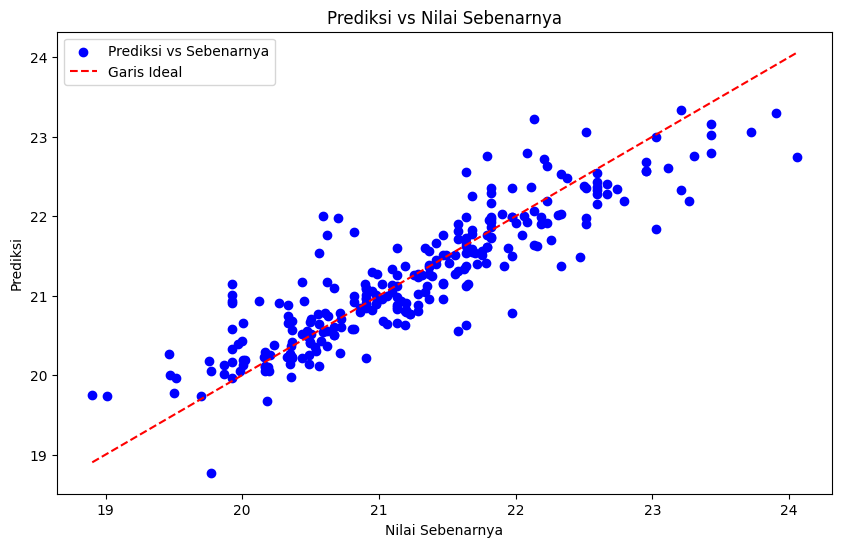

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

Mean Squared Error rf: 0.13269650123022314
R-squared rf: 0.8494711109857108
Mean Absolute Error rf: 0.24430893204296192


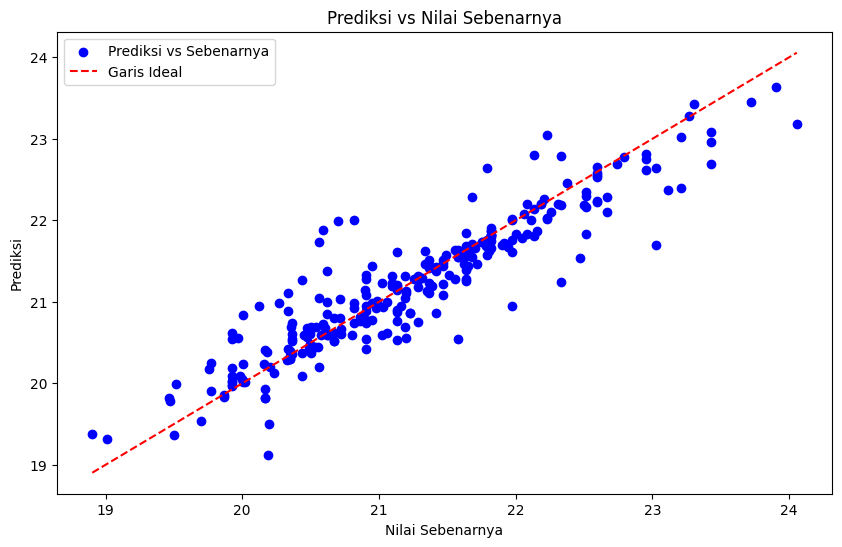

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor()

model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Gradient Boosting:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Gradient Boosting:
Mean Squared Error: 0.13921246620405128
R-squared: 0.842079499607317
Mean Absolute Error: 0.2694133120359327


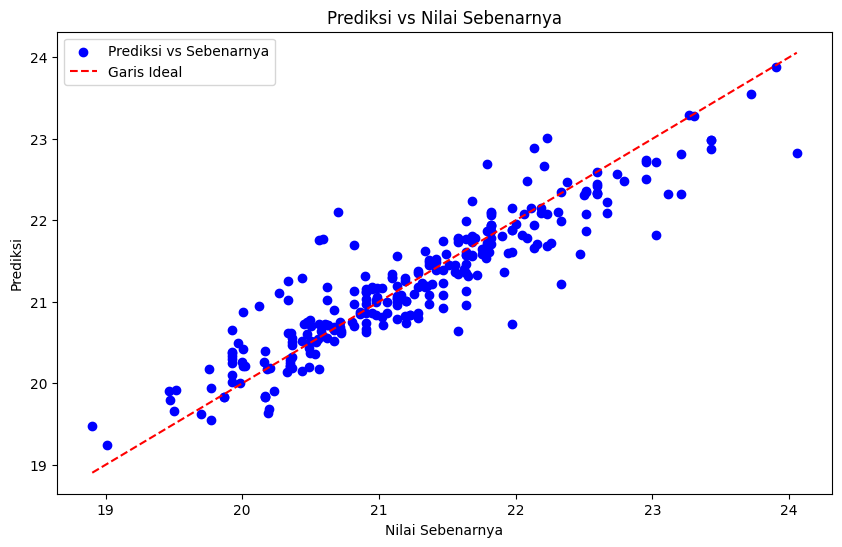

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mendefinisikan model RandomForestRegressor
model = RandomForestRegressor()

# Menentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Melatih model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari hasil pencarian
best_model = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

# Evaluasi model yang telah di-tune
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Model Terbaik setelah Tuning:')
print(f'Mean Squared Error rf: {mse}')
print(f'R-squared rf: {r2}')
print(f'Mean Absolute Error rf: {mae}')

# Menampilkan parameter terbaik
print('Parameter Terbaik:')
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Model Terbaik setelah Tuning:
Mean Squared Error rf: 0.13027233630759524
R-squared rf: 0.8522210467353919
Mean Absolute Error rf: 0.24047288646915016
Parameter Terbaik:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


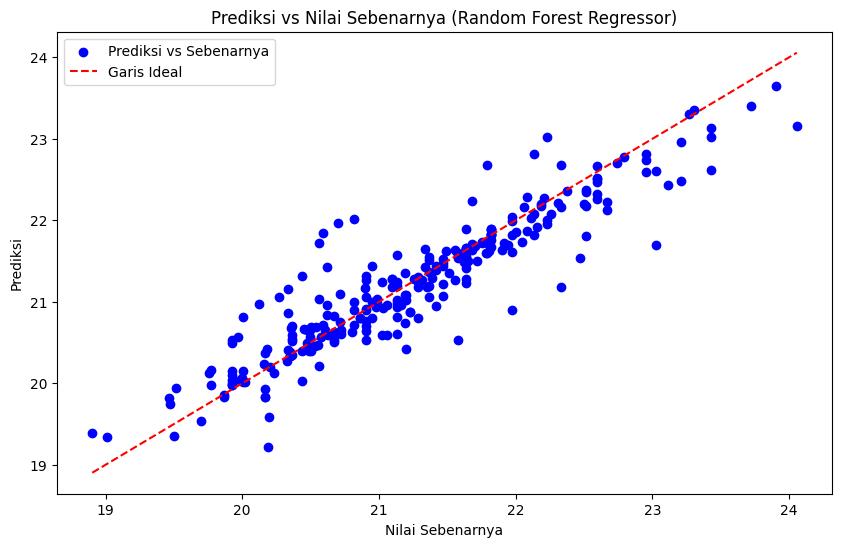

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya (Random Forest Regressor)')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [ ]:
import pickle

# Simpan model ke dalam file .pkl
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)